<a href="https://colab.research.google.com/github/tuyishimejohnson/ML-data_processing/blob/main/ml_pipeline_Johnson_Noe_Tuyishime_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Irrigation Modernization for Enhanced Food Productivity in Rwanda
## Student Name: Johnson Noe Tuyishime

---

1. **Data Sources and Aggregation:**

  I will obtain my data from multiple sources:
  Google Datasets: The dataset on climate, soil moisture, crop health, etc., will be sourced from Google datasets or Kaggle.

  IoT Sensor Data: Sensor data from devices monitoring climate, soil, and crop health.

  **Data sources:**

  https://huggingface.co/datasets/MuraliKrish/cropData

  https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset

  **Articles**

  https://www.sciencedirect.com/science/article/pii/S209563391730299X

  https://www.sciencedirect.com/science/article/pii/S2095311920634177

  https://link.springer.com/chapter/10.1007/978-3-030-73100-7_16


   - Data aggregation for comprehensive analysis.

  The data will need to be aggregated from these various sources to combine climate, soil moisture, crop health, and other relevant variables to build a cohesive dataset for the model.



2. **Data Format Transformation:**

  **Format**:

  The data from Google dataset or Kaggle is typically in CSV or JSON format. The IoT sensor data may come in real-time streams or logs, possibly in formats like CSV, JSON, or directly from databases.

  Data will be cleaned and preprocessed. I will normalize numerical data, convert timestamps, and handle categorical data.
  I plan to merge different data points for example combining climate and soil moisture data into one unified dataset.
  Data may need to be aggregated over periods for example daily, or weekly to match the prediction intervals.

3. **Data Exploration:**

   **Current Features:**

  Climate data:
  temperature, humidity, wind speed, rainfall.

  Soil data: moisture levels, nutrient content, pH levels.

  Crop health: visual assessments, leaf color, growth stages.

  **Data Exploration:**

  I will perform exploratory data analysis (EDA) to understand correlations between features, data distributions, and identify any patterns or trends.
  Visualizations such as histograms, scatter plots will help to better understand the relationships between different features.

Dataset Summary:
       temperature   humidity  soil_moisture  crop_health_score
count     5.000000   5.000000       5.000000           5.000000
mean     23.400000  59.400000       0.352000           7.600000
std       1.294218   3.646917       0.039623           1.140175
min      22.000000  55.000000       0.300000           6.000000
25%      22.500000  58.000000       0.330000           7.000000
50%      23.000000  59.000000       0.350000           8.000000
75%      24.500000  60.000000       0.380000           8.000000
max      25.000000  65.000000       0.400000           9.000000

Missing Values:
temperature          0
humidity             0
soil_moisture        0
crop_health_score    0
dtype: int64

Data Types:
temperature          float64
humidity               int64
soil_moisture        float64
crop_health_score      int64
dtype: object

Correlation Matrix:
                   temperature  humidity  soil_moisture  crop_health_score
temperature           1.000000  0.619716      

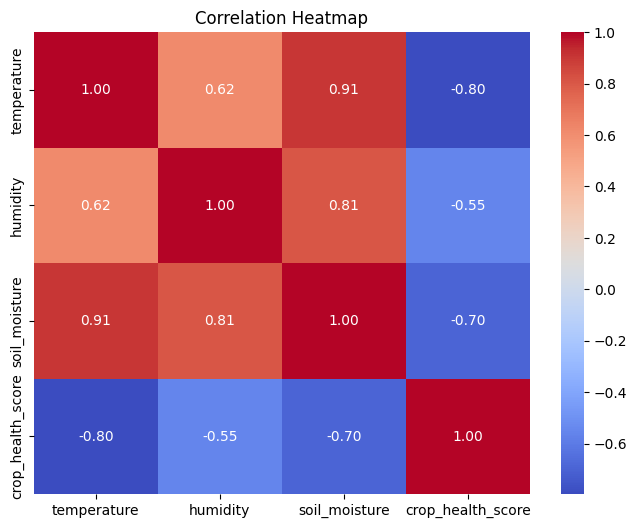

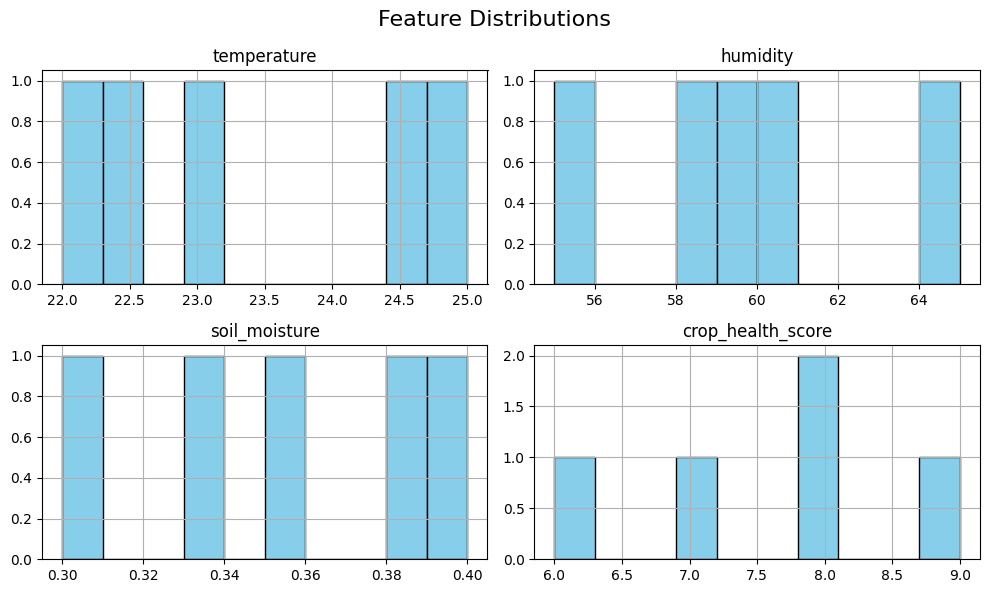

In [ ]:
#Include plots for EDA


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    "temperature": [22.5, 23.0, 25.0, 24.5, 22.0],
    "humidity": [55, 60, 65, 58, 59],
    "soil_moisture": [0.3, 0.35, 0.4, 0.38, 0.33],
    "crop_health_score": [8, 9, 6, 7, 8]
}
df = pd.DataFrame(data)

# Summary of the dataset
print("Dataset Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr())

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Plot histograms for data distributions
df.hist(bins=10, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()





4. **Hypothesis Testing:**

  **Pre-existing Hypotheses**:

  - Higher rainfall correlates with reduced irrigation needs.
  - Soil moisture levels affect the crop health indicators.
  - Specific climate conditions might trigger flood or drought events.

  **Testing Hypotheses**:

  - I will test these hypotheses using statistical analysis such as correlation coefficients and feature importance analysis within machine learning models.

5. **Handling Sparse/Dense Data and Outliers:**

  **Density:**

  - The data may be sparse depending on the completeness of the sensor data.

 **Handling Missing Data:**

  - I will use techniques like imputation for exampel mean, median imputation
  or remove rows with significant missing data depending on the severity.
  For time series data, forward filling or interpolation may be used.

  **Handling Outliers:**

  - Outliers will be identified using z-scores or IQR methods, and either removed or replaced depending on the analysis.

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    "temperature": [22.5, 23.0, np.nan, 24.5, 22.0],
    "humidity": [55, np.nan, 60, 58, np.nan],
    "soil_moisture": [np.nan, 0.3, 0.4, np.nan, 0.5]
}
df = pd.DataFrame(data)

# Detect missing values
print("Missing Values:\n", df.isnull().sum())

# Handling missing values
# 1. Fill with mean for numerical columns
df["temperature"].fillna(df["temperature"].mean(), inplace=True)

# 2. Forward fill for time-series data (example)
df["humidity"].fillna(method="ffill", inplace=True)

# 3. Backward fill for sparse data
df["soil_moisture"].fillna(method="bfill", inplace=True)

print("\nData after imputation:\n", df)


Missing Values:
 temperature      1
humidity         2
soil_moisture    2
dtype: int64

Data after imputation:
    temperature  humidity  soil_moisture
0         22.5      55.0            0.3
1         23.0      55.0            0.3
2         23.0      60.0            0.4
3         24.5      58.0            0.5
4         22.0      58.0            0.5


<ipython-input-1-1a5508dfcc02>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["temperature"].fillna(df["temperature"].mean(), inplace=True)
<ipython-input-1-1a5508dfcc02>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

6. **Data Splitting:**

  - The dataset will be split into training, validation, and testing sets (typically 70%, 15%, and 15%, respectively).
  I will ensure that the splitting respects time-series data dependencies if applicable (e.g., using temporal cross-validation).


7. **Bias Mitigation:**

  Bias Reduction:

  - I will ensure the dataset is representative of all possible conditions, avoiding overrepresentation of any specific type of data (e.g., extreme weather conditions).
  Stratified sampling can be used to ensure the dataset remains balanced across different classes (e.g., healthy vs. unhealthy crops).
  Any potential biases from IoT sensors or external conditions will be considered during the feature selection process.
  
- Features for Model Training

 Selected Features for Model Training:

 Climate data: Temperature, humidity, and rainfall.

 Soil data: Soil moisture, nutrients, and pH levels.

 Crop health data: Visual assessment scores and growth metrics.

- Feature Selection:

  Feature importance methods (e.g., random forests, mutual information) will be used to identify the most relevant features for prediction.


8. **Features for Model Training:**
   Selected Features for Model Training:

  Climate data: Temperature, humidity, and rainfall.

  Soil data: Soil moisture, nutrients, and pH levels.

  Crop health data: Visual assessment scores and growth metrics.

  Feature Selection:

  Feature importance methods such as random forests will be used to identify the most relevant features for prediction.

9. **Types of Data Handling:**

   **Categorical Data:**

  Crop stage, irrigation system type.

  **Numerical Data:**

  Climate measurements, soil moisture levels, temperature, crop health metrics.

  **Data Transformation:**

  Categorical data will be one-hot encoded or label encoded as appropriate.
  Numerical data will be normalized or standardized for model training.



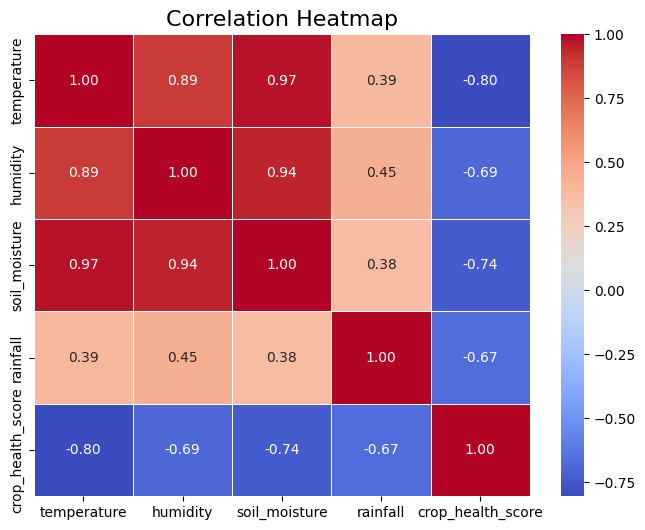

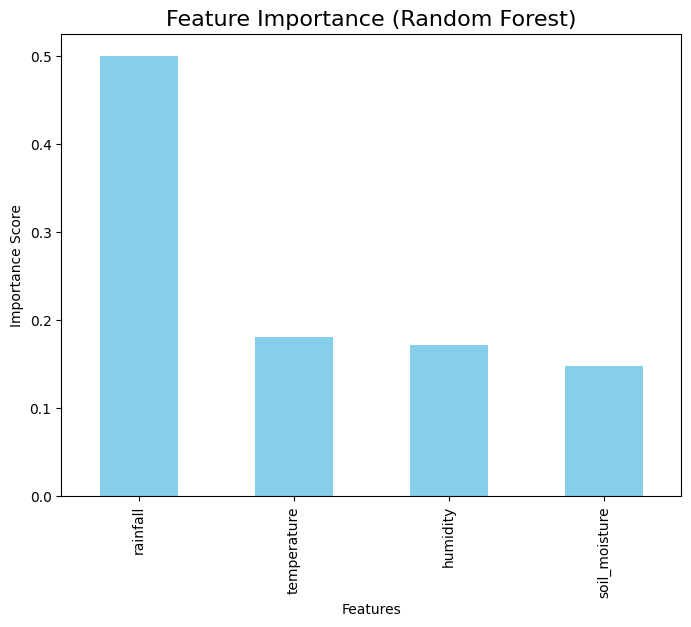

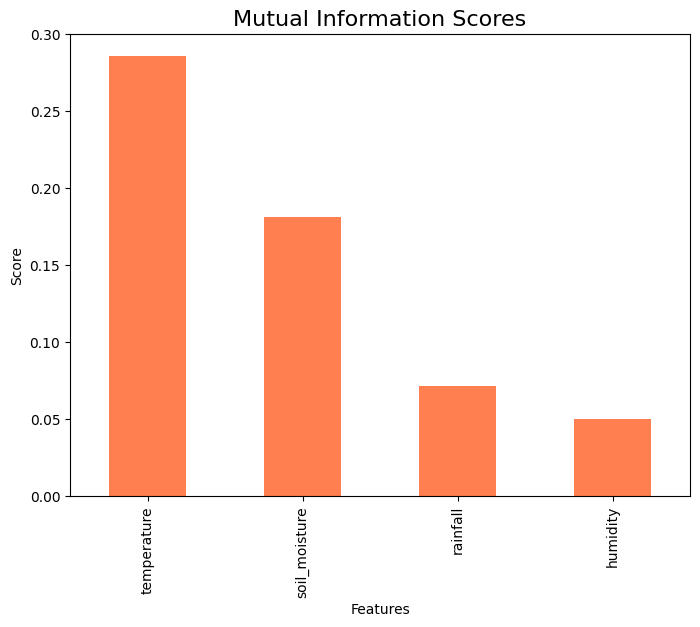

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

# Sample dataset
data = {
    "temperature": [22.5, 23.0, 25.0, 24.5, 22.0, 26.0, 27.5],
    "humidity": [55, 60, 65, 58, 59, 67, 70],
    "soil_moisture": [0.3, 0.35, 0.4, 0.38, 0.33, 0.45, 0.5],
    "rainfall": [120, 85, 150, 100, 130, 90, 170],
    "crop_health_score": [8, 9, 6, 7, 8, 7, 6]
}
df = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Prepare features (X) and target (y)
X = df.drop(columns=["crop_health_score"])  # Features
y = df["crop_health_score"]                 # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance from Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Random Forest feature importance
plt.figure(figsize=(8, 6))
rf_feature_importances.plot(kind="bar", color="skyblue")
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Calculate mutual information
mutual_info = mutual_info_regression(X, y)
mi_scores = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Plot mutual information scores
plt.figure(figsize=(8, 6))
mi_scores.plot(kind="bar", color="coral")
plt.title("Mutual Information Scores", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()



10. **Data Transformation for Modeling:**

- **Normalization:** Rescale numerical data to [0, 1] using Min-Max Scaling.
- **Standardization:** Standardize numerical features to have a mean of 0 and a standard deviation of 1.
- **Encoding:** Convert categorical variables:
    - Use **One-Hot Encoding** for nominal categories.
    - Use **Label Encoding** for ordinal categories.

11. **Data Storage:**

  **Storage Location:**
  The data will be stored on a  PostgreSQL database for structured data.
  Backup and version control of datasets will be managed using mostly GitHub repositories or cloud storage solutions.



---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.